# Computer Lab Exercises week 10 SOLUTIONS

* These lab exercises are designed to work with SQL.
* These exercises are **not** part of the assessment of the Module.
* I will post the solutions roughly 1 week after this file has been uploaded to the DLE.


* See https://sites.google.com/view/pythonforstemstudents/home for a collection
of links to information on python.


##  Question 1 :Inserting into a database


A human resources (HR) department has a simple database to record
whether staff have had a flu vaccination. There are 30 staff members,
tagged with a staff number. 

A cell below creates the empty table to record whether the employee has had a flu vaccination. 


The flujab column records whether the staff member has has flu
vaccination, 0 means no vaccination and 1 is a vaccination has been done.

The staff nurse of the company does the flu vaccination of staff
members. The nurse needs an application to record when a staff member
has a flu vaccination. 
* The python script should input the staff number 
and record in the database that the vaccination has been done.
* The SQL command ``UPDATE'' should be used. See
https://www.pythoncentral.io/introduction-to-sqlite-in-python/ for some examples of updating a database and the podcast https://youtu.be/2ZthhviQbVQ.
* The code should check that the staff number entered is between 0 and 30.

In [1]:
#  Run this cell to create the database
# https://www.python-course.eu/sql_python.php
#

import sqlite3
import sys

#
#  create the database file
#
file_name = "FLUJAB_info.db"
connection = sqlite3.connect(file_name)
cursor = connection.cursor()

cursor.execute("DROP TABLE IF EXISTS HR_info")

#  schema for the table
sql_command = """
CREATE TABLE IF NOT EXISTS HR_info ( 
staff_number INTEGER PRIMARY KEY, 
flujab INTEGER);"""

cursor.execute(sql_command)

#  write the initial empty table 
nemployers = 30
no_jab = 0 
for i in range(0, nemployers) :
  cursor.execute('''INSERT INTO HR_info (staff_number, flujab)
                  VALUES(?,?)''', (str(i),  str(no_jab) ))


connection.commit()
print("Database created for flujab written to the file " , "FLUJAB_info.db")

connection.close()

Database created for flujab written to the file  FLUJAB_info.db


In [2]:
# Put your solution here

#  Script to record whether a staff member
#  has had a flu jab.
#
#  The database can be created using the script
#  create_flue_database.py 
#  from https://gist.github.com/cmcneile/72f960cf2fa6a4515ba8348b10adf890

import sqlite3
import sys

nemployers = 30

print("----------------------------------------")
print("Record flu jab")
print("----------------------------------------")

staff_number_ = input("Input staff number ")
staff_number = int(staff_number_)

connection = sqlite3.connect("FLUJAB_info.db")
cursor = connection.cursor()

# test that the insertion works
cursor.execute("select * from HR_info ")
result = cursor.fetchall() 
print("Staff_number flu_jab")
for r in result:
    print(r[0], r[1])

connection.close()


----------------------------------------
Record flu jab
----------------------------------------
Input staff number 3
Staff_number flu_jab
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0


In [ ]:
# Put your solution here 

import sqlite3
import sys

nemployers = 30

print("----------------------------------------")
print("Record flu jab")
print("----------------------------------------")

try:
  staff_number_ = input("Input staff number ")
  staff_number = int(staff_number_)
except:
  print("Input invalid " , staff_number_)
  sys.exit(0)

if staff_number <0 or staff_number >= nemployers :
   print("staff_number " , staff_number , "is out of range")
   sys.exit(0)

connection = sqlite3.connect("FLUJAB_info.db")
cursor = connection.cursor()

sql_command = "UPDATE HR_info SET flujab = ? WHERE staff_number = ? "
cursor.execute(sql_command,(1, staff_number))
print(staff_number, " has been recored as having a vaccination")


# test that the insertion works
cursor.execute("select * from HR_info ")
result = cursor.fetchall() 
print("Staff_number flu_jab")
for r in result:
    print(r[0], r[1])

connection.close()

# Question 2: Deleting and modifing a table in a database

In this question we will continue to work with the database in the file 
FLUJAB_info.db
created by the call in question 1.

The Human Resources (HR) department wants to update the database file. The staff members
with staff numbers below 5 have left the company, so they need to be
deleted from the table in the database. The HR department wants to add another
column to record whether the employee has has a covid jab.

* **(a)** Delete the rows with staff numbers less than 5 from the table.
* **(b)** Add a column called ``covid_jab'' to the HR_info table. You do not need fill the column,



In [ ]:
#  put your solution here

import sqlite3
import sys

nemployers = 30


connection = sqlite3.connect("FLUJAB_info.db")
cursor = connection.cursor()

#
sql_command = "DELETE FROM HR_info WHERE staff_number < 5"
cursor.execute(sql_command)
connection.commit()

sql_command = "ALTER TABLE HR_info ADD COLUMN covidjab INTEGER"
cursor.execute(sql_command)

connection.commit()

cursor.execute("select * from HR_info ")
result = cursor.fetchall() 
print("Staff_number flu_jab covid_jab")
for r in result:
    print(r[0], r[1], r[2])

connection.close()

## Question 3: Creating a entity-relationship diagram


A doctor is an entity with attributes Name and Age. A patient
is entity with attributes, NHS number, Doctor, Name, and Age. The NHS
number is the primary key for the patient. There is a one to many
relationship between the Doctor and Patient.
Use the software https://app.diagrams.net/ to draw an 
entity-relationship diagram for the doctor and patient.

See the podcast https://youtu.be/-s2o2H6eQr0 as background.

The final picture should look like:


![erdiag](https://github.com/cmcneile/COMP5000-2024-lab/blob/main/wk10_Q3_sol.png?raw=true)


##  Question 4: inheritance in classes

A python code is being written to organize the students and supervisors on a MSc program. The starting point is the Person Class.



In [ ]:
class Person:
  def __init__(self, name, lastname):
    self.name = name
    self.lastname = lastname

  def printname(self):
    print(self.name, self.lastname)

  def info(self) :
      print("Person")

Define a new class MScStudent that inherits from
the Person class and it also stores the student ID.
In addition to the constructor, the MScStudent
should have the method info(), which prints the name,
student ID, and "MSc student".

Similarly, define a new class MScSupervisor 
that inherits from
the Person class and it also stores the staff ID.
In addition to the constructor, the MScSupervisor
should have the method info(), which prints the name,
staff ID, and "MSc Supervisor".

The classes should be used as
<pre>
x = MScStudent("John", "Smith" , 1000)
x.printname()
x.info()

print("  ")
y = MScSupervisor("Roger" , "Kenway" , 2035)
y.printname()
y.info()

</pre>

The output should look be:

<pre>
John Smith
MSc student
John Smith
Student ID =  1000
 
Roger Kenway
MSc Supervisor
Roger Kenway
Staff number =  2035

</pre>

In [ ]:
#  put your solution here

class Person:
  def __init__(self, name, lastname):
    self.name = name
    self.lastname = lastname

  def printname(self):
    print(self.name, self.lastname)

  def info(self) :
      print("Person")

class MScStudent(Person):
  """
  Class to store information about MSc student
  """
  def __init__(self, name, lastname,id):
     super().__init__(name, lastname)
     self.student_id = id 
  def info(self):
    print("MSc student")
    super().printname()
    print("Student ID = " , self.student_id )

class MScSupervisor(Person):
  """
  Classs to store information about MSc supervisor
  """
  def __init__(self, name, lastname, id):
    super().__init__(name, lastname)
    self.staff_no = id
  def info(self):
    print("MSc Supervisor")
    super().printname()
    print("Staff number = " , self.staff_no)

#  use the classes

x = MScStudent("John", "Smith" , 1000)
x.printname()
x.info()

print(" ")
y = MScSupervisor("Roger" , "Kenway" , 2035)
y.printname()
y.info()

## Question 5, Unit tests

This is an example of using the python testing framework
unitest \url{https://realpython.com/python-testing/}
In regression analysis, an equation is found which represents
y values in terms of an input variable x and some parameters.
There are techniques to find the parameters for a set of x and 
y numbers. 

For this problem I am just asking you to write tests for the
following models.

Constant model, where $y$ is equal to a constant $c$
$$
y = c
$$

Linear model, where $y$ depends on $x$ via
$$
y = mx +c
$$
and the parameters $m$ and $c$.



Quadratic model, where $y$ depends on $x$ via
$$
y = a_2 x^2 + a_1 x + a_0
$$
and the parameters $a_2$, $a_1$, and $a_0$.

I have coded the linear and constant models in the
python script  fit\_model.py.
Add the quadrature fit model to the class fit\_model 
and add some suitable tests to the testing framework.
Are their enough tests for the linear\_model method?

In [ ]:
import unittest

class fit_model :

    def __init__(self):
       pass

    def constant_model(self, x, c ) :
        y =  c
        return y

    def linear_model(self, x, m ,c ) :
        y = m*x + c
        return y


# The testing framework
class Test_fit_model_Methods(unittest.TestCase):

   def test_a(self) :
       model = fit_model()
       self.assertEqual(model.linear_model(1,1,1), 2)

   def test_b(self) :
       model = fit_model()
       self.assertEqual(model.constant_model(2, 5.5), 5.5)
      

##
##
## 

unittest.main(argv=[''], exit=False)



In [ ]:
##   put you solution here


import unittest

class fit_model :

    def __init__(self):
       pass

    def constant_model(self, x, c ) :
        y =  c
        return y

    def linear_model(self, x, m ,c ) :
        y = m*x + c
        return y

    def quadratic_model(self, x, a2, a1 ,a0 ) :
        y = a2*x**2 + a1*x + a0
        return y


# The testing framework
class Test_fit_model_Methods(unittest.TestCase):

   def test_a(self) :
       model = fit_model()
       self.assertEqual(model.linear_model(1,1,1), 2)

#  The test case for linear is not very complete
#  It does not check whether m and c are switched.
#

   def test_aa(self) :
       model = fit_model()
       self.assertEqual(model.linear_model(2,3,-1), 5)

   def test_b(self) :
       model = fit_model()
       self.assertEqual(model.constant_model(2, 5.5), 5.5)
      
        
   def test_c(self) :
       model = fit_model()
       self.assertEqual(model.quadratic_model(1,1,1,1), 3)

##
##
## 

unittest.main(argv=[''], exit=False)

# Question 6 

This question uses the python module plotnine that allows plots in the format of the R graphics package ggplot

* Making Plots With plotnine https://datacarpentry.github.io/python-ecology-lesson/07-visualization-ggplot-python.html 
*  A Grammar of Graphics for Python  https://plotnine.org/

To use plotnine you will need to install it 

pip install plotnine

and then restart the kernel.


The cells below create a data frame that is randoom and then plots it


In [1]:
import numpy as np
import pandas as pd
from plotnine import (
    ggplot,
    aes,
    geom_point,
    theme_matplotlib,
    theme_set,
)

# Set default theme for all the plots
theme_set(theme_matplotlib())

In [2]:
np.random.seed(123)
n = 150

df = pd.DataFrame({
    "x": np.random.randint(0, 101, n),
    "y": np.random.randint(0, 101, n),
    "var1": np.random.randint(1, 6, n),
    "var2": np.random.randint(0, 11, n)
})

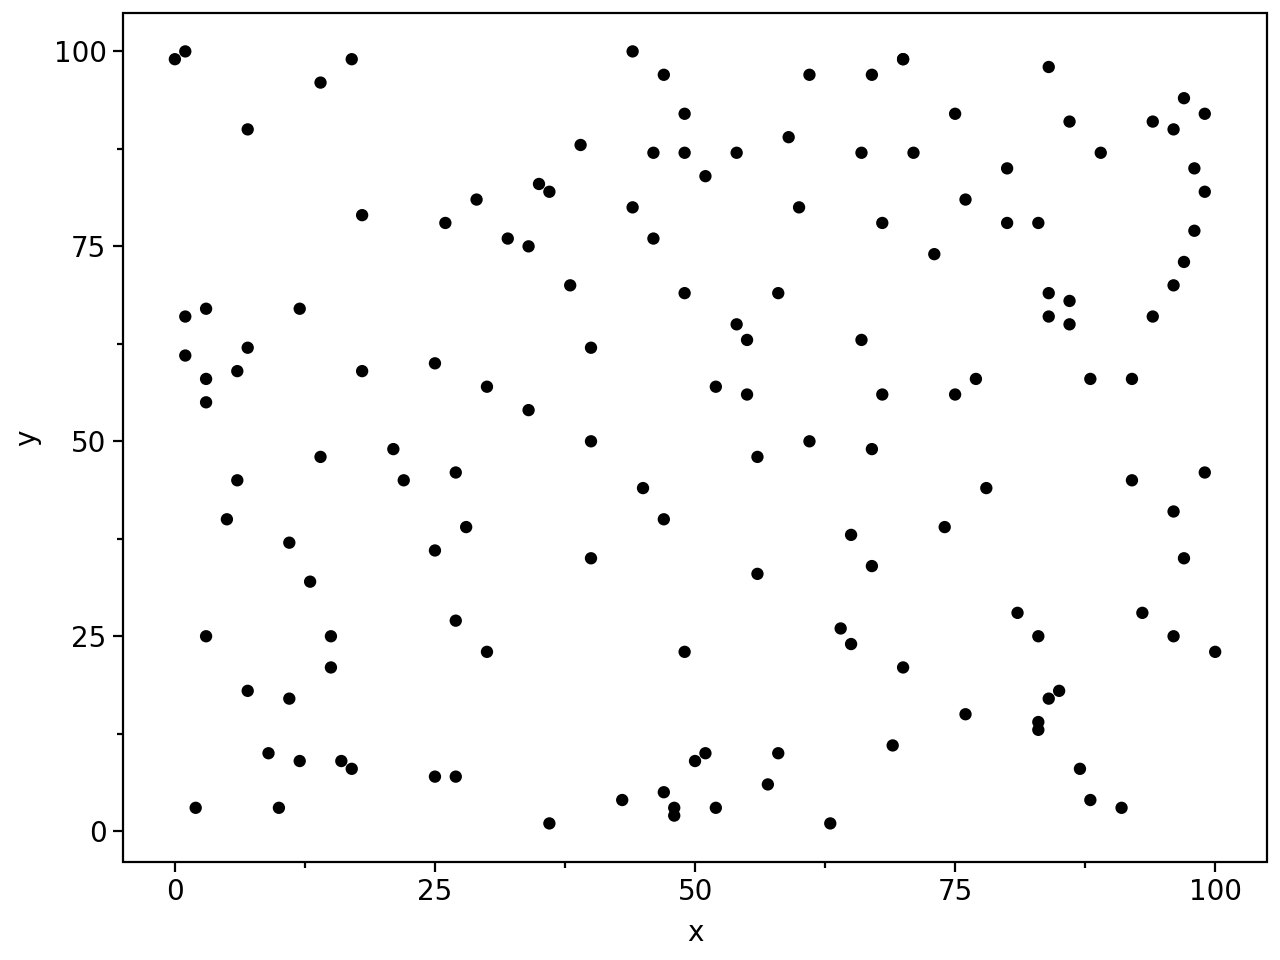

In [3]:
# Gallery, points
(
    ggplot(df, aes("x", "y"))
    + geom_point()
)

In [4]:
#  Question modify this example to plot "lifeExp" versus "gdpPercap" using plotnine

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder_unfiltered.csv')

print(df.columns)

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


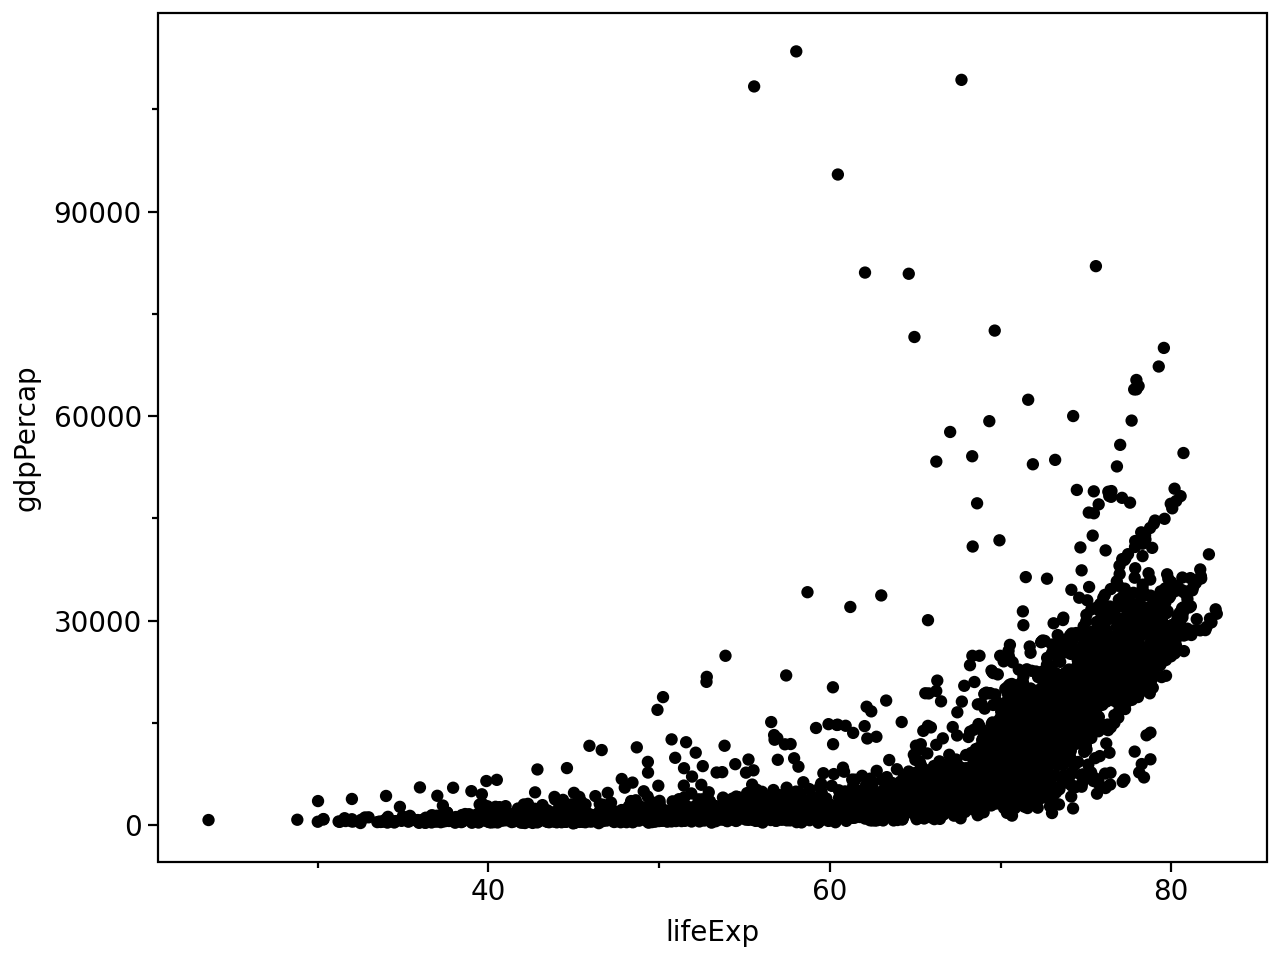

In [5]:
## put your solution here

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder_unfiltered.csv')

print(df.columns)

from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap

(
    ggplot(df, aes("lifeExp", "gdpPercap"))
    + geom_point()
)
